In [1]:
import scipy
print("Version de SciPy :", scipy.__version__)

Version de SciPy : 1.15.2


In [ ]:
import numpy as np
from scipy import stats

data = [12, 15, 13, 12, 18, 20, 22, 21]

moyenne = stats.tmean(data)
mediane = np.median(data)
variance = np.var(data)
ecart_type = np.std(data)

print("Moyenne :", moyenne)
print("Médiane :", mediane)
print("Variance :", variance)
print("Écart-type :", ecart_type)

Moyenne : 16.625
Médiane : 16.5
Variance : 14.984375
Écart-type : 3.8709656418005056


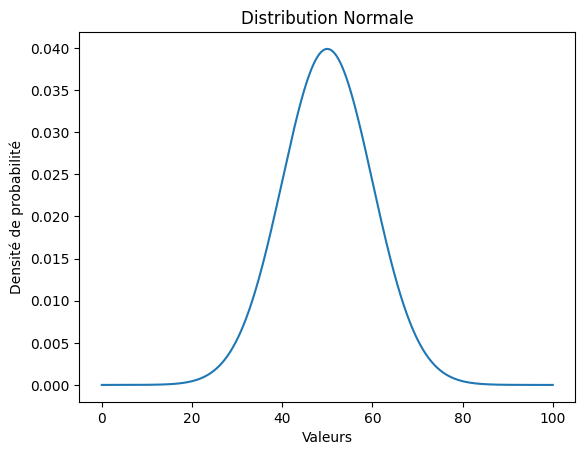

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


x = np.linspace(0, 100, 1000)
y = norm.pdf(x, 50, 10)


plt.plot(x, y)
plt.title("Distribution Normale")
plt.xlabel("Valeurs")
plt.ylabel("Densité de probabilité")
plt.show()

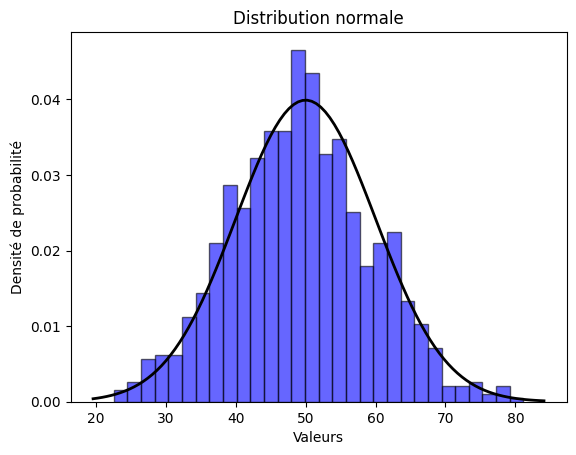

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

moyenne = 50
ecart_type = 10
data = np.random.normal(moyenne, ecart_type, 1000)


plt.hist(data, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, moyenne, ecart_type)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel("Valeurs")
plt.ylabel("Densité de probabilité")
plt.title("Distribution normale")
plt.show()


In [ ]:
from scipy.stats import ttest_ind

data1 = np.random.normal(50, 10, 100)
data2 = np.random.normal(60, 10, 100)


stat, p_value = ttest_ind(data1, data2)

print(f"Statistique du test T : {stat}")
print(f"Valeur p : {p_value}")


if p_value < 0.05:
    print("Il y a une différence significative entre les deux échantillons.")
else:
    print("Aucune différence significative n'est détectée.")


Statistique du test T : -5.519025624224998
Valeur p : 1.0597092797427253e-07
Il y a une différence significative entre les deux échantillons.


Pente : 1828.7671232876712
Intercept : 64383.56164383562
Prédiction pour 90m² : 228972.60273972602


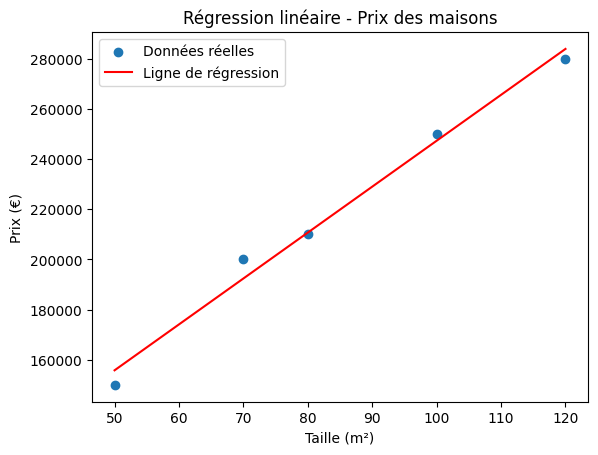

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


house_sizes = np.array([50, 70, 80, 100, 120])
house_prices = np.array([150000, 200000, 210000, 250000, 280000])


slope, intercept, r_value, p_value, std_err = linregress(house_sizes, house_prices)


predicted_price = slope * 90 + intercept

print(f"Pente : {slope}")
print(f"Intercept : {intercept}")
print(f"Prédiction pour 90m² : {predicted_price}")


plt.scatter(house_sizes, house_prices, label="Données réelles")
plt.plot(house_sizes, slope * house_sizes + intercept, color='red', label="Ligne de régression")
plt.xlabel("Taille (m²)")
plt.ylabel("Prix (€)")
plt.title("Régression linéaire - Prix des maisons")
plt.legend()
plt.show()


In [ ]:
from scipy.stats import f_oneway


fertilizer_1 = [5, 6, 7, 6, 5]
fertilizer_2 = [7, 8, 7, 9, 8]
fertilizer_3 = [4, 5, 4, 3, 4]

stat, p_value = f_oneway(fertilizer_1, fertilizer_2, fertilizer_3)

print(f"Statistique F : {stat}")
print(f"Valeur p : {p_value}")


if p_value < 0.05:
    print("Il y a une différence significative entre les engrais.")
else:
    print("Aucune différence significative entre les engrais.")


Statistique F : 28.52631578947368
Valeur p : 2.754267209804844e-05
Il y a une différence significative entre les engrais.


In [13]:
from scipy.stats import binom

n = 10  
p = 0.5  


prob = binom.pmf(5, n, p)

print(f"Probabilité d'obtenir exactement 5 faces en 10 lancers : {prob}")


Probabilité d'obtenir exactement 5 faces en 10 lancers : 0.24609375


In [ ]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr


data = pd.DataFrame({'age': [23, 25, 30, 35, 40], 'income': [35000, 40000, 50000, 60000, 70000]})

pearson_corr, _ = pearsonr(data['age'], data['income'])


spearman_corr, _ = spearmanr(data['age'], data['income'])

print(f"Corrélation de Pearson : {pearson_corr}")
print(f"Corrélation de Spearman : {spearman_corr}")


Corrélation de Pearson : 0.9996907452347201
Corrélation de Spearman : 0.9999999999999999
